In [68]:
import numpy as np
import pandas as pd
import statistics
import math
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
pd.set_option('display.max_colwidth', -1)

In [70]:
train = pd.read_csv("data/train_limpio.csv",encoding = "ISO-8859-1")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [71]:
df = train.iloc[1:5]
df.head()

,id,keyword,location,text,target
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


# Las palabras mas comunes de las noticias y su correspondiente target

In [72]:
from itertools import chain

In [73]:
lens = train['text'].str.split(' ').map(len)
lens

0       13
1       7 
2       22
3       9 
4       17
        ..
6984    13
6985    20
6986    19
6987    26
6988    20
Name: text, Length: 6989, dtype: int64

In [74]:
res = pd.DataFrame({'id': np.repeat(train['id'], lens),
                    'keyword': np.repeat(train['keyword'], lens),
                    'location': np.repeat(train['location'], lens),
                    'text': np.repeat(train['text'], lens),
                    'target': np.repeat(train['target'], lens)
                   }).reset_index()

In [75]:
res.head(60)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
2,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
3,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
4,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
5,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
6,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
7,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
8,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
9,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1


In [76]:
len(res)

104199

In [77]:
#no hacerlo,tara muchísimo, ya guarde el dataframe editado mas abajo
id_actual = 0
posicion_actual = 0
palabras = 0
for i in range (len(res)):
    current_id = res.loc[i,'id']
    if(id_actual !=current_id):
        posicion_actual = 0
        palabras = list((res.loc[i,'text'].split(' ')))
        id_actual = current_id
    else:
        posicion_actual = posicion_actual + 1
    res.loc[i,'text'] = palabras[posicion_actual]

In [78]:
res.head(100)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our,1
1,0,1,NaN,NaN,Deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,Reason,1
5,0,1,NaN,NaN,of,1
6,0,1,NaN,NaN,this,1
7,0,1,NaN,NaN,#earthquake,1
8,0,1,NaN,NaN,May,1
9,0,1,NaN,NaN,ALLAH,1


In [88]:
res['text'] = res['text'].map(lambda x: x.lstrip('#').rstrip(',')).map(lambda x: (x.lower()))

In [89]:
res.head(100)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,our,1
1,0,1,NaN,NaN,deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,reason,1
5,0,1,NaN,NaN,of,1
6,0,1,NaN,NaN,this,1
7,0,1,NaN,NaN,earthquake,1
8,0,1,NaN,NaN,may,1
9,0,1,NaN,NaN,allah,1


In [90]:
res.to_csv('data/train_una_palabra_por_fila.csv', index=False)

In [167]:
palabra_por_fila = pd.read_csv("data/train_una_palabra_por_fila.csv",encoding = "ISO-8859-1")
palabra_por_fila.head(6)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,our,1
1,0,1,NaN,NaN,deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,reason,1
5,0,1,NaN,NaN,of,1


In [168]:
prepositions = ['of','if', 'with', 'at', 'from', 'into','during','including','until','among','throughout','despite','towards','upon','concerning','to','in','for','on','by','about','like','through','over','before','between','after','since','without','under','within','along','following','across','behind','beyond','plus','except','but','up','out','around','down','off','above','near']
connectors = ['and', 'plus', 'furthermore', 'moreover', 'in addition', 'also', 'as well as','when', 'while', 'as', 'as soon as', 'then', 'after', 'afterwards', 'next', 'firstly', 'secondly', 'finally',  'but', 'however', 'though', 'although', 'nevertheless', 'despite', 'whereas', 'while', 'unless', 'otherwise','because', 'as', 'due to', 'so', 'in order to', 'so', 'therefore', 'as a result', 'consequently']
subjects = ['the','a','and','that','it','this','be','was','are','have','just','so','not','as','will','when','an','has','no','why','first','see','were','their','go','them','last']

In [94]:
palabra_por_fila = palabra_por_fila[~( (palabra_por_fila['text'].isin(prepositions)) | (palabra_por_fila['text'].isin(connectors)) | (palabra_por_fila['text'].isin(subjects)))]

In [169]:
#primero las agrupo por cada twit,mismo id, así si una palabra 
#aparece varias veces en un mismo twit, solo la cuento una.
palabra_por_mencion = palabra_por_fila.groupby(['id','text']).target.mean().to_frame().reset_index()
palabra_por_mencion.head()

,id,text,target
0,1,all,1
1,1,allah,1
2,1,are,1
3,1,deeds,1
4,1,earthquake,1


In [170]:
palabra_por_mencion = palabra_por_mencion.groupby('text').agg({'target':['mean','count']})
palabra_por_mencion.columns=['target mean','target count']
palabra_por_mencion.head()

,target mean,target count
text,,
\n,0.5,32
\n\n,0.0,3
\n\n#mtvsummerstar,0.0,1
\n\n#rt,0.0,1
\n\n+,1.0,1


In [171]:
palabra_por_mencion.shape

(22974, 2)

### examinamos las palabras mas asociadas a noticias verdaderas  y falsas que hayan aparecido varias veces

In [172]:
# noticias verdaderas
palabras_mas_veridicas = palabra_por_mencion[(palabra_por_mencion['target count']>50)].nlargest(20,'target mean').reset_index()
palabras_mas_veridicas.head(30)

,text,target mean,target count
0,hiroshima,0.984615,65
1,bombing,0.964912,57
2,killed,0.959459,74
3,california,0.942029,69
4,suicide,0.929412,85
5,near,0.862745,51
6,fires,0.820896,67
7,forest,0.807692,52
8,train,0.805970,67
9,accident,0.787879,66


<BarContainer object of 20 artists>

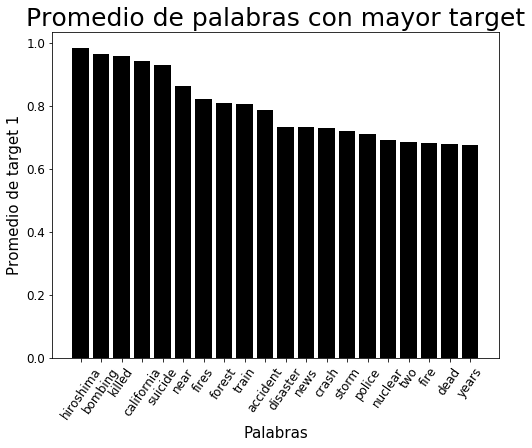

In [173]:
# Variables a graficar
x = palabras_mas_veridicas['text']
y = palabras_mas_veridicas['target mean']

# Tamaño del gráfico
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Palabras", fontsize = 15);
plt.ylabel("Promedio de target 1", fontsize = 15);

# Título
plt.title("Promedio de palabras con mayor target", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.tick_params(axis='both', which='minor', labelsize = 12)

# Rotar ejes
plt.xticks(rotation = 55)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


### Los twits tienen mayor probabilidad de ser verdaderos cuando tienen esas palabras, tiene sentido porque estas son mas usadas en noticias que en otras conversaciones

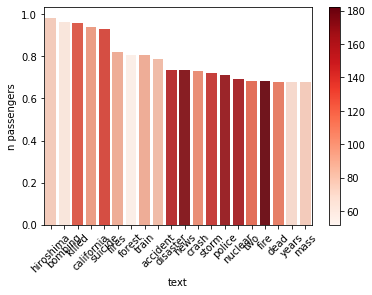

In [153]:
#no voy a usar este gráfico pero lo dejo xq va a servir mas adelante
norm = plt.Normalize(palabras_mas_veridicas['target count'].min(), palabras_mas_veridicas['target count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
ax = sns.barplot(x=palabras_mas_veridicas['text'], y=palabras_mas_veridicas['target mean'], hue=palabras_mas_veridicas['target count'], palette='Reds', 
                 dodge=False)
ax.set_ylabel('n passengers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

In [117]:
# noticias verdaderas
palabras_menos_veridicas = palabra_por_mencion[(palabra_por_mencion['target count']>50)].nsmallest(20,'target mean').reset_index()
palabras_menos_veridicas.head(30)

,text,target mean,target count
0,full,0.074074,54
1,you're,0.090909,55
2,body,0.100917,109
3,love,0.125000,88
4,lol,0.127273,55
5,let,0.129630,54
6,want,0.152778,72
7,??????,0.166667,54
8,you,0.172174,575
9,i'm,0.173077,208


<BarContainer object of 20 artists>

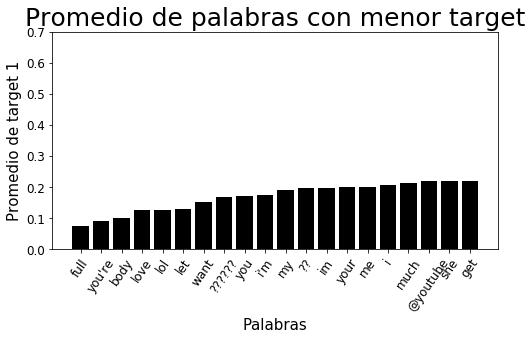

In [161]:
# Variables a graficar
x = palabras_menos_veridicas['text']
y = palabras_menos_veridicas['target mean']

# Tamaño del gráfico
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Palabras", fontsize = 15);
plt.ylabel("Promedio de target 1", fontsize = 15);

# Título
plt.title("Promedio de palabras con menor target", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.tick_params(axis='both', which='minor', labelsize = 12)

# Rotar ejes
plt.xticks(rotation = 55)

# Límites para cada coordenada

# Tipo de gráficok
plt.ylim(0, 0.7)
plt.bar(x, y, color = 'black')

### Dejando de lado palabras como "body","let","want",etc, la precencia de pronombres personales indica mayor probabilidad de que el tweet sea falso ya que los mismos no se usan en noticias, como "you re","you","i'm","my","me","i"